<a href="https://colab.research.google.com/github/habstrakT808/Neural-Network-Diabetes-Prediction-with-Backpropagation-and-MLP/blob/main/HAFIYAN_AL_MUQAFFI_UMARY_Neural_Network_Diabetes_Prediction_with_Backpropagation_and_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pengolahan Sebagian Dataset Tanpa Library

#Perhitungan Kode dengan Metode Manual

In [ ]:
# Memilih 5 fitur dan target 'Diabetes_binary'
selected_features = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke']
if all(feature in data.columns for feature in selected_features):
    data_selected = data[selected_features]

    # Menampilkan 3 baris acak dengan target 'Diabetes_binary' == 0.0
    data_target_0 = data_selected[data_selected['Diabetes_binary'] == 0.0].sample(3)
    print("\n3 Baris acak dengan target Diabetes_binary = 0.0:")
    print(data_target_0)

    # Menampilkan 3 baris acak dengan target 'Diabetes_binary' == 1.0
    data_target_1 = data_selected[data_selected['Diabetes_binary'] == 1.0].sample(3)
    print("\n3 Baris acak dengan target Diabetes_binary = 1.0:")
    print(data_target_1)
else:
    print("\nBeberapa fitur yang dipilih tidak ada dalam dataset.")


3 Baris acak dengan target Diabetes_binary = 0.0:
       Diabetes_binary  HighBP  HighChol  CholCheck  Smoker  Stroke
22288              0.0     0.0       0.0        1.0     0.0     0.0
8143               0.0     0.0       0.0        1.0     1.0     0.0
28209              0.0     0.0       1.0        1.0     1.0     0.0

3 Baris acak dengan target Diabetes_binary = 1.0:
       Diabetes_binary  HighBP  HighChol  CholCheck  Smoker  Stroke
44249              1.0     1.0       1.0        1.0     1.0     0.0
42428              1.0     0.0       0.0        1.0     0.0     0.0
43697              1.0     1.0       1.0        1.0     0.0     0.0


#Feed Forward, Backpropagation, Update Weight Tanpa Library

In [ ]:
import numpy as np
import pandas as pd

# Definisikan dataset
data = {
    'X1': np.array([0, 1, 0, 1, 0, 1]),
    'X2': np.array([0, 0, 0, 1, 0, 1]),
    'X3': np.array([1, 1, 1, 1, 1, 1]),
    'X4': np.array([0, 1, 0, 0, 1, 1]),
    'X5': np.array([0, 1, 0, 0, 0, 1]),
    'Target': np.array([0, 0, 0, 1, 1, 1])
}

# Definisikan parameter jaringan (bobot dan bias)
weights = {
    'W_biasZ1': np.array([-0.2, 0.1, 0.2, -0.25, 0.3, -0.1]),
    'W_biasZ2': np.array([0.4, -0.3, -0.4, 0.35, -0.1, 0.2]),
    'W_X1Z1': np.array([0.1, -0.2, 0.4, 0.5, -0.5, -0.3]),
    'W_X1Z2': np.array([-0.3, 0.4, 0.1, -0.6, 0.2, 0.35]),
    'W_X2Z1': np.array([0.5, -0.1, -0.3, -0.2, -0.4, 0.4]),
    'W_X2Z2': np.array([-0.6, 0.6, 0.25, 0.3, 0.7, -0.25]),
    'W_X3Z1': np.array([-0.4, 0.3, -0.6, 0.4, 0.25, 0.5]),
    'W_X3Z2': np.array([0.3, -0.5, 0.2, -0.3, 0.4, 0.1]),
    'W_X4Z1': np.array([0.7, 0, -0.5, 0.7, -0.6, 0.9]),
    'W_X4Z2': np.array([-0.9, -0.6, 0.6, 0.9, 0.8, 0.1]),
    'W_X5Z1': np.array([-0.1, 0.6, -0.1, -0.4, 0.5, 0.2]),
    'W_X5Z2': np.array([0.9, -0.5, 0.4, -0.5, 0.8, 0.1]),
    'W_biasY1': np.array([0.25, -0.2, 0.4, -0.15, 0.15, -0.3]),
    'W_biasY2': np.array([-0.15, 0.3, -0.3, 0.25, -0.25, 0.5]),
    'W_Z1Y1': np.array([0.35, 0.15, 0.1, 0.6, -0.35, 0.4]),
    'W_Z1Y2': np.array([0.45, -0.4, 0.5, -0.2, 0.4, 0.25]),
    'W_Z2Y1': np.array([-0.25, 0.5, -0.2, 0.4, 0.3, -0.45]),
    'W_Z2Y2': np.array([0.6, -0.35, 0.45, 0.1, -0.5, 0.35])
}


# Fungsi aktivasi (sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Fungsi diferensial sigmoid
def diferensial(x):
    return x * (1 - x)

# Definisikan jumlah epoch dan learning rate
epochs = 2
learning_rate = 0.1

# Proses Training
for epoch in range(epochs):
    # Feedforward
    # Layer Z1 dan Z2 (Hidden layer)
    Z1_input = data['X1'] * weights['W_X1Z1'] + data['X2'] * weights['W_X2Z1'] + data['X3'] * weights['W_X3Z1'] + data['X4'] * weights['W_X4Z1'] + data['X5'] * weights['W_X5Z1'] + weights['W_biasZ1']
    Z2_input = data['X1'] * weights['W_X1Z2'] + data['X2'] * weights['W_X2Z2'] + data['X3'] * weights['W_X3Z2'] + data['X4'] * weights['W_X4Z2'] + data['X5'] * weights['W_X5Z2'] + weights['W_biasZ2']

    Z1 = sigmoid(Z1_input)  # Output dari neuron Z1
    Z2 = sigmoid(Z2_input)  # Output dari neuron Z2

    # Layer Y1 dan Y2 (Output layer)
    Y1_input = Z1 * weights['W_Z1Y1'] + Z2 * weights['W_Z2Y1'] + weights['W_biasY1']
    Y2_input = Z1 * weights['W_Z1Y2'] + Z2 * weights['W_Z2Y2'] + weights['W_biasY2']

    Y1 = sigmoid(Y1_input)  # Output dari neuron Y1
    Y2 = sigmoid(Y2_input)  # Output dari neuron Y2

    # Output akhir
    output = np.array([Y1, Y2])

    # Backpropagation
    # Target output yang diinginkan
    target = data['Target']

    # Hitung error output
    error_Y1 = target - Y1
    error_Y2 = target - Y2

    # f'(Yin1) dan f'(Yin2)
    f_prime_Yin1 = diferensial(Y1)
    f_prime_Yin2 = diferensial(Y2)

    # Gradient untuk Y1 dan Y2
    gradient_Y1 = error_Y1 * f_prime_Yin1
    gradient_Y2 = error_Y2 * f_prime_Yin2

    # Perubahan bobot pada layer output
    dW_Z1Y1 = learning_rate * gradient_Y1 * Z1
    dW_Z1Y2 = learning_rate * gradient_Y2 * Z1
    dW_Z2Y1 = learning_rate * gradient_Y1 * Z2
    dW_Z2Y2 = learning_rate * gradient_Y2 * Z2

    # Gradient untuk Yin1 dan Yin2
    gradient_Yin1 = gradient_Y1 * weights['W_Z1Y1'] + gradient_Y2 * weights['W_Z1Y2']
    gradient_Yin2 = gradient_Y1 * weights['W_Z2Y1'] + gradient_Y2 * weights['W_Z2Y2']

    # f'(Zin1) dan f'(Zin2)
    f_prime_Zin1 = diferensial(Z1)
    f_prime_Zin2 = diferensial(Z2)

    # Gradient untuk Z1 dan Z2
    gradient_Z1 = gradient_Yin1 * f_prime_Zin1
    gradient_Z2 = gradient_Yin2 * f_prime_Zin2

    # Perubahan bobot pada layer Z (Hidden layer)
    dW_biasZ1 = learning_rate * gradient_Z1
    dW_biasZ2 = learning_rate * gradient_Z2  # Pembaruan bobot bias Z2 yang benar

    dW_X1Z1 = learning_rate * gradient_Z1 * data['X1']
    dW_X1Z2 = learning_rate * gradient_Z2 * data['X1']
    dW_X2Z1 = learning_rate * gradient_Z1 * data['X2']
    dW_X2Z2 = learning_rate * gradient_Z2 * data['X2']
    dW_X3Z1 = learning_rate * gradient_Z1 * data['X3']
    dW_X3Z2 = learning_rate * gradient_Z2 * data['X3']
    dW_X4Z1 = learning_rate * gradient_Z1 * data['X4']
    dW_X4Z2 = learning_rate * gradient_Z2 * data['X4']
    dW_X5Z1 = learning_rate * gradient_Z1 * data['X5']
    dW_X5Z2 = learning_rate * gradient_Z2 * data['X5']

    # Perubahan bobot pada layer output
    dW_biasY1 = learning_rate * gradient_Y1
    dW_biasY2 = learning_rate * gradient_Y2

    print(f"Epoch {epoch + 1}")
    # .
    output_dict = {
        'f\'(Yin1)': f_prime_Yin1,
        'f\'(Yin2)': f_prime_Yin2,
        'f\'(Zin1)': f_prime_Zin1,
        'f\'(Zin2)': f_prime_Zin2,
        'Gradient y1': gradient_Y1,
        'Gradient y2': gradient_Y2,
        'ΔW(Z1Y1)': dW_Z1Y1,
        'ΔW(Z1Y2)': dW_Z1Y2,
        'ΔW(Z2Y1)': dW_Z2Y1,
        'ΔW(Z2Y2)': dW_Z2Y2,
        'Gradient Yin1': gradient_Yin1,
        'Gradient Z1': gradient_Z1,
        'Gradient Yin2': gradient_Yin2,
        'Gradient Z2': gradient_Z2,
        'ΔW(X1Z1)': dW_X1Z1,
        'ΔW(X1Z2)': dW_X1Z2,
        'ΔW(X2Z1)': dW_X2Z1,
        'ΔW(X2Z2)': dW_X2Z2,
        'ΔW(X3Z1)': dW_X3Z1,
        'ΔW(X3Z2)': dW_X3Z2,
        'ΔW(X4Z1)': dW_X4Z1,
        'ΔW(X4Z2)': dW_X4Z2,
        'ΔW(X5Z1)': dW_X5Z1,
        'ΔW(X5Z2)': dW_X5Z2
    }

    # Format output dictionary as a DataFrame for better readability
    output_df = pd.DataFrame(output_dict)
    print(output_df)
    print("-" * 60)
    # Update bobot dengan perubahan yang dihitung
    weights['W_biasZ1'] += dW_biasZ1
    weights['W_biasZ2'] += dW_biasZ2
    weights['W_X1Z1'] += dW_X1Z1
    weights['W_X1Z2'] += dW_X1Z2
    weights['W_X2Z1'] += dW_X2Z1
    weights['W_X2Z2'] += dW_X2Z2
    weights['W_X3Z1'] += dW_X3Z1
    weights['W_X3Z2'] += dW_X3Z2
    weights['W_X4Z1'] += dW_X4Z1
    weights['W_X4Z2'] += dW_X4Z2
    weights['W_X5Z1'] += dW_X5Z1
    weights['W_X5Z2'] += dW_X5Z2
    weights['W_biasY1'] += dW_biasY1
    weights['W_biasY2'] += dW_biasY2
    weights['W_Z1Y1'] += dW_Z1Y1
    weights['W_Z1Y2'] += dW_Z1Y2
    weights['W_Z2Y1'] += dW_Z2Y1
    weights['W_Z2Y2'] += dW_Z2Y2

    # Menyimpan bobot yang terupdate ke dalam dictionary untuk setiap epoch
    updated_weights_dict = {
        'W_biasZ1': weights['W_biasZ1'],
        'W_biasZ2': weights['W_biasZ2'],
        'W_X1Z1': weights['W_X1Z1'],
        'W_X1Z2': weights['W_X1Z2'],
        'W_X2Z1': weights['W_X2Z1'],
        'W_X2Z2': weights['W_X2Z2'],
        'W_X3Z1': weights['W_X3Z1'],
        'W_X3Z2': weights['W_X3Z2'],
        'W_X4Z1': weights['W_X4Z1'],
        'W_X4Z2': weights['W_X4Z2'],
        'W_X5Z1': weights['W_X5Z1'],
        'W_X5Z2': weights['W_X5Z2'],
        'W_biasY1': weights['W_biasY1'],
        'W_biasY2': weights['W_biasY2'],
        'W_Z1Y1': weights['W_Z1Y1'],
        'W_Z1Y2': weights['W_Z1Y2'],
        'W_Z2Y1': weights['W_Z2Y1'],
        'W_Z2Y2': weights['W_Z2Y2'],
    }

    # Convert the dictionary to DataFrame for better readability
    updated_weights_df = pd.DataFrame(updated_weights_dict)

    print(f"Updated Weights after Epoch {epoch + 1}:")
    print(updated_weights_df)
    print("-" * 60)


Epoch 1
   f'(Yin1)  f'(Yin2)  f'(Zin1)  f'(Zin2)  Gradient y1  Gradient y2  ΔW(Z1Y1)  \
0  0.247342  0.239763  0.228784  0.221713    -0.136424    -0.144140 -0.004834   
1  0.249998  0.249901  0.213910  0.149146    -0.124668    -0.122462 -0.008602   
2  0.242493  0.249335  0.240261  0.247517    -0.142257    -0.131097 -0.005709   
3  0.240659  0.248167  0.237759  0.246134     0.097071     0.113460  0.005928   
4  0.247406  0.238784  0.249844  0.187370     0.111101     0.144680  0.005416   
5  0.245894  0.202527  0.139764  0.228784     0.138704     0.057136  0.011540   

   ΔW(Z1Y2)  ΔW(Z2Y1)  ΔW(Z2Y2)  ...  ΔW(X1Z1)  ΔW(X1Z2)  ΔW(X2Z1)  ΔW(X2Z2)  \
0 -0.005108 -0.009116 -0.009631  ... -0.000000 -0.000000 -0.000000 -0.000000   
1 -0.008450 -0.002274 -0.002234  ...  0.000648 -0.000290  0.000000 -0.000000   
2 -0.005261 -0.006404 -0.005902  ... -0.000000 -0.000000 -0.000000 -0.000000   
3  0.006928  0.004250  0.004968  ...  0.000845  0.001235  0.000845  0.001235   
4  0.007053  0.008335  0

#Pengolahan Seluruh Dataset Menggunakan Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA

In [ ]:
from google.colab import files
import pandas as pd

# Mengunggah file
uploaded = files.upload()

# Menampilkan file yang diunggah
for filename in uploaded.keys():
    print(f"File yang diunggah: {filename} ({len(uploaded[filename])} bytes)")

# Memastikan nama file sesuai dengan file yang diunggah
file_name = list(uploaded.keys())[0]  # Mengambil nama file pertama yang diunggah

# Memuat file ke dalam DataFrame
try:
    data = pd.read_csv(file_name)
    # Menampilkan 5 baris pertama dari data
    print("\n5 Baris pertama dari dataset:")
    print(data.head())
except Exception as e:
    print(f"Error saat memuat file: {e}")



Saving diabetes_binary_5050split_health_indicators_BRFSS2015.csv to diabetes_binary_5050split_health_indicators_BRFSS2015.csv
File yang diunggah: diabetes_binary_5050split_health_indicators_BRFSS2015.csv (6347570 bytes)

5 Baris pertama dari dataset:
   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           

#Data Cleaning


In [ ]:
# Menangani Missing Values
data = data.dropna()  # Hapus baris yang memiliki missing value

# Encoding kolom kategorikal jika ada
# Asumsi: Kolom 'Sex' adalah kategorikal (contoh)
data = pd.get_dummies(data, drop_first=True)  # Encoding kolom kategorikal

# Normalisasi data menggunakan StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = data.drop('Diabetes_binary', axis=1)  # Fitur
y = data['Diabetes_binary']  # Target

# Melakukan fit dan transformasi pada seluruh fitur
X_scaled = scaler.fit_transform(X)
print(X_scaled)


[[ 0.88020109 -1.05279808  0.15927581 ... -1.60723742  1.04856175
   1.05815996]
 [ 0.88020109  0.94984976  0.15927581 ...  1.19768093  1.04856175
   1.05815996]
 [-1.13610402 -1.05279808  0.15927581 ...  1.54829572  1.04856175
   1.05815996]
 ...
 [ 0.88020109  0.94984976  0.15927581 ...  1.54829572  1.04856175
  -0.78076781]
 [ 0.88020109  0.94984976  0.15927581 ...  0.84706614 -2.83842972
  -0.78076781]
 [ 0.88020109  0.94984976  0.15927581 ...  0.14583655  1.04856175
  -1.70023169]]


#Pemisahan Kategori Data

In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data latih dan data uji
print(f"Data latih: {X_train.shape}, Data uji: {X_test.shape}")


Data latih: (56553, 21), Data uji: (14139, 21)


#Backpropagation dengan MLPClassifier

Accuracy: 0.7382
Precision: 0.7211
Recall: 0.7743
F1 Score: 0.7468
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73      7090
         1.0       0.72      0.77      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



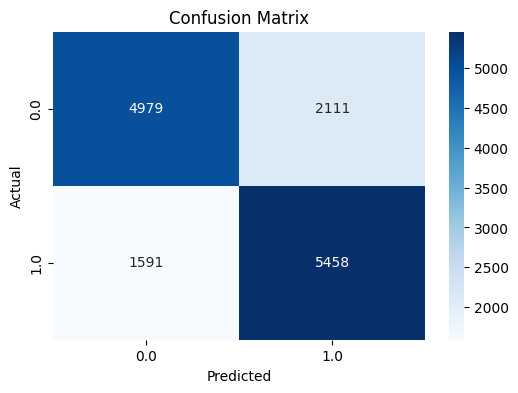

In [ ]:
from sklearn.neural_network import MLPClassifier

# Membuat dan melatih model MLP
mlp = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = mlp.predict(X_test)

# Menghitung metrik
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Menampilkan metrik
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Menampilkan classification report untuk melihat semua metrik sekaligus
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#Pengolahan menggunakan confusion_matrix, classification_report, accuracy_score

Accuracy: 0.7382
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73      7090
         1.0       0.72      0.77      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



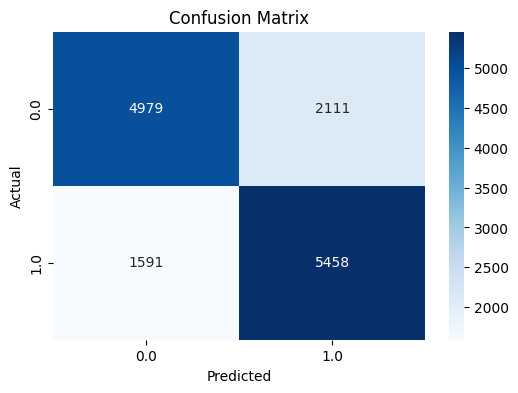

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Menghitung accuracy
accuracy = accuracy_score(y_test, y_pred)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Menampilkan classification report
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(class_report)

# Visualisasi confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#Pengolahan menggunakan RandomizedSearchCV

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best Parameters: {'activation': 'relu', 'alpha': 0.059785015794648705, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}

Accuracy setelah RandomizedSearchCV: 0.7537
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.76      0.75      0.75     14139
weighted avg       0.76      0.75      0.75     14139



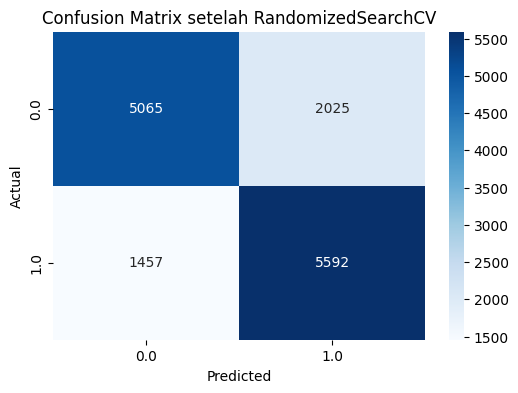

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Menyiapkan distribusi parameter untuk RandomizedSearchCV
param_dist = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': uniform(0.0001, 0.1),  # Uniform distribution
    'learning_rate': ['constant', 'adaptive']
}

# Melakukan RandomizedSearchCV
random_search = RandomizedSearchCV(
    MLPClassifier(max_iter=1000, random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # Jumlah kombinasi yang dicoba (lebih sedikit untuk eksperimen)
    cv=3,  # Jumlah fold untuk cross-validation
    n_jobs=-1,  # Gunakan semua core CPU
    verbose=2,
    random_state=42
)

# Melatih model dengan RandomizedSearchCV
random_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print(f"\nBest Parameters: {random_search.best_params_}")

# Melatih model terbaik dan mengevaluasi
best_mlp_random = random_search.best_estimator_
y_pred_random = best_mlp_random.predict(X_test)

# Evaluasi model terbaik
accuracy_random = accuracy_score(y_test, y_pred_random)
print(f"\nAccuracy setelah RandomizedSearchCV: {accuracy_random:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_random))

# Confusion Matrix setelah tuning
conf_matrix_random = confusion_matrix(y_test, y_pred_random)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_random, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix setelah RandomizedSearchCV')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#Pengolahan menggunakan PCA



Accuracy setelah PCA: 0.7320
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.66      0.71      7090
         1.0       0.70      0.81      0.75      7049

    accuracy                           0.73     14139
   macro avg       0.74      0.73      0.73     14139
weighted avg       0.74      0.73      0.73     14139



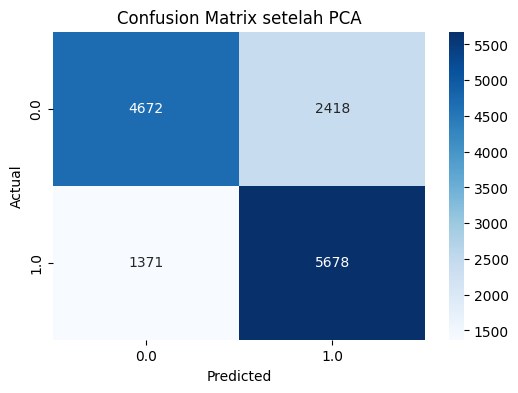

In [ ]:
from sklearn.decomposition import PCA

# Mengurangi dimensi menjadi 2 untuk visualisasi dan analisis
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Melatih model menggunakan data yang sudah dikurangi dimensinya
mlp_pca = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp_pca.fit(X_train_pca, y_train)

# Prediksi pada data uji
y_pred_pca = mlp_pca.predict(X_test_pca)

# Evaluasi model setelah PCA
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"\nAccuracy setelah PCA: {accuracy_pca:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_pca))

# Confusion Matrix setelah PCA
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_pca, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix setelah PCA')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
